1. For test scores in .csv file, run gradient descent algorithm to find out
value of m, b and appropriate learning rate

2. On each iteration, compare previous cost with current cost. Stop
when costs are similar (use math.isclose function with 1e-20 thresold)

3. Now using sklearn.linear_model find coefficient (i.e. m) and
intercept (i.e b). Compare them with m, b generated by your gradient
descent algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import isclose

c:\Users\Mayank\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    learning_rate = 0.0001
    max_iterations = 10000
    n = len(x)
    
    plt.scatter(x, y, color='red', marker='+', linewidth=5)
    
    prev_cost = float('inf')  # Initialize with a high value
    iterations = 0  # Count the iterations
    
    for i in range(max_iterations):
        y_pred = m_curr * x + b_curr
        
        # Calculate the cost function
        cost = (1 / (2 * n)) * sum((y_pred - y) ** 2)
        
        if isclose(cost, prev_cost, rel_tol=1e-20):
            break  # Stop if the cost converges
        
        prev_cost = cost
        
        md = -(2/n) * sum(x * (y - y_pred))
        bd = -(2/n) * sum(y - y_pred)
        
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        iterations += 1

    plt.show()
    return m_curr, b_curr, iterations

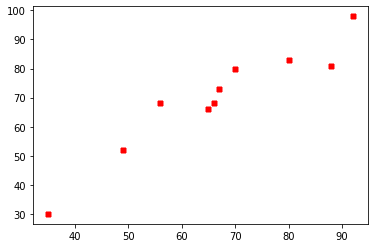

In [10]:
df = pd.read_csv("test_scores.csv")

df['math'] = pd.to_numeric(df['math'], errors='coerce')
df['cs'] = pd.to_numeric(df['cs'], errors='coerce')

df.dropna(subset=['math', 'cs'], inplace=True)

x = df['math'].to_numpy()
y = df['cs'].to_numpy()

m, b, iterations = gradient_descent(x, y)

In [11]:
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)
sklearn_m, sklearn_b = reg.coef_[0], reg.intercept_

print(f"Gradient Descent - Coefficient (m): {m}, Intercept (b): {b}")
print(f"Sklearn - Coefficient (m): {sklearn_m}, Intercept (b): {sklearn_b}")
print(f"Number of Iterations: {iterations}")

Gradient Descent - Coefficient (m): 1.0416453883775232, Intercept (b): 0.22083987539287592
Sklearn - Coefficient (m): 1.017736237856933, Intercept (b): 1.9152193111568891
Number of Iterations: 10000
